# Rossmann Store Sales

## Problema de Negócio

Vamos começar entendendo o problema de negócio fazendo quatro perguntas.

Imagine o seguinte cenário:

<span style="color:red">
O CFO da empresa fez uma reunião com todos os Gerentes de Loja e pediu para que cada um deles trouxesse uma previsão diária das próximas 6 semanas de vendas.

Depois dessa reunião, todos os Gerentes de Loja entraram em contato com você, requisitando uma previsão de vendas de sua loja.
</span>

Precisamos entender a divisão para realizar o método cíclico do nosso trabalho. Os passos são

1. Questão de negócio 
- Alguém vai te pedir alguma coisa. 

2. Entendimento do negócio
- Entenda o que as pessoas querem, não apenas chegar resolvendo o problema das pessoas.

3. Coletar os dados
- Usar SQL para coleta de dados, bancos diferentes, várias tabelas, etc.

4. Limpeza dos dados
- Tirar "ç", acentos, numero é numero, caracter é caracter, ajustar os dados para serem sempre limpos

5. Exploração dos dados
- Entender, por exemplo, o que puxa as vendas para cima, para baixo, etc. Usar métricas de correlações entre outros testes estatísticos.

6. Modelagem dos dados
- Preparar os dados para algoritmos de Machine Learning. Separar dados em treino e teste, fazer encoding em variaveis categóricas, entre outros.

7. Aplicar algoritmos de Machine Learning nos dados
- Decidir qual algoritmo aplicar.

8. Avaliação do algoritmo
- Avaliar acurácia, entre outros.

Repetir todos os passos até a performance estar como esperada, depois disso passar pro ponto 9.

9. Modelo em produção
- Disponibilizar para as pessoas os modelos pronto.

## Questão de negócio (1)

- Qual valor das vendas de cada loja nas próximas 6 semanas?

## Entendimento do negócio (2)

### Passo para resolver o entendimento do negócio 
1. Entender a motivação
- Qual o contexto?

2. Entender qual a causa raiz do problema
- Porque fazer uma previsão de vendas?

3. Quem é o dono do problema
- Quem será o Stakeholder ("maior interessado")

4. Entender o formato da solução
- Granularidade: Resultado em dia, mês, semanas, ano, etc.
- Tipo de problema: Clusterização, Regressão, 
- Potenciais Métodos: TimeSeries, Rede Neural, Deep Learning, etc.
- Formato da entrega: "Dashboard", "CSV", "No celular", etc.

**Dicas**

- Não saia resolvendo o problema dos outros de primeira. Dê um passo para o lado e entenda a real necessidade.

### Para o nosso problema

1. O CFO requisitou essa solução durante uma reunião de resultados mensais.
2. Investimento em Reforma das Lojas
3. CFO
4. - Vendas diárias em R$, nas próximas 6 semanas
   - Problema de predição
   - TimeSeries, Regressão e Neural Network
   - Predições acessadas via celular

## Coleta dos dados (3)

Os dados foram coletados do Kaggle: https://www.kaggle.com/c/rossmann-store-sales/data

## Limpeza dos dados (4)

- Os dados disponibilizados pelo Kaggle já vem limpos.

## Exploração dos dados (5)

Precisamos saber algumas coisas para resolver o problema.

-- Quantidade de dados:
- Eu tenho os recursos corretos para trabalhar?
    Se estivermos lidando com problemas de MUITAS linhas (muitas da ordem de trilhão) é necessário alguns programas específicos para trabalhar com Big Data: Servidores, Clusters, Sparks, Hadoop, etc.
    
-- Tipos de variáveis:
- Quais os tipos de variáveis?
    % Numérico, % Categórico, % Temporal
    Isto é importante para saber como lidar com o problema.
    
-- Quantidades de dados faltantes:
- Qual o volume de NA? 
    É importante saber para decidir se fará o projeto ou dar um jeito de preencher estes dados vazios. 
    
- Qual a razão dos dados estarem faltando?
    Será problema do sistema? Ou são imputs manuais que o pessoal tá esquecendo de preencher.
    
-- Resumo geral dos dados:
- Estatisticas Descritivas
    Maximo, Mínimo, media, mediana, range, etc.

# 0.0 IMPORTS

## 0.1 HELPER FUNCTIONS

In [73]:
import pandas as pd
import inflection
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 0.2 LOADING DATA

In [2]:
df_sales_raw = pd.read_csv('data/train.csv', low_memory = False) 
df_store_raw = pd.read_csv('data/store.csv', low_memory = False) 
#Este comando low_memory fala ao read_csv para ler o arquivo todo de uma vez só.

#merge
df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')
#primeiro argumento: arquivo de referencia. segundo argumento: arquivo que vai ser anexado a referencia. 
#Terceiro: como fazer este merge. Quarto: igual nos dois datasets e vão servir como chave pra fazer o merge.
#merge é um método da classe pandas.

#Juntamos os dois datasetes a partir do "Store", como cada dataset tem caracteristicas da loja, juntamos tudo.

In [3]:
df_raw.sample()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
79988,824,4,2015-05-21,8005,960,1,1,0,0,a,a,17570.0,NaN,NaN,0,NaN,NaN,NaN


# 1.0 DESCRIÇÃO DOS DADOS

## 1.1 Rename Columns

In [4]:
df1 = df_raw.copy()

In [5]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
            'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
            'CompetitionDistance', 'CompetitionOpenSinceMonth',
            'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
            'Promo2SinceYear', 'PromoInterval']
snakecase = lambda x: inflection.underscore(x)
cols_new = list(map(snakecase, cols_old))
#Rename

df1.columns = cols_new

In [6]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## 1.2 Data Dimension

In [7]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of cols: {}'.format(df1.shape[1]))

Number of rows: 1017209
Number of cols: 18


## 1.3 Data Types

In [8]:
df1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [9]:
df1['date'] = pd.to_datetime(df1['date'])

In [10]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4 Check NA

In [11]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

# 1.5 Fillout NA

In [17]:
df1.sample()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
137377,233,1,2015-03-30,13298,1275,1,1,0,1,a,a,1890.0,NaN,NaN,0,NaN,NaN,NaN


In [12]:
df1['competition_distance'].max()

75860.0

In [46]:
#competition_distance
df1['competition_distance'] = df1['competition_distance'].apply( lambda x: 200000.0 if math.isnan(x) else x )


#competition_open_since_month   
df1['competition_open_since_month'] = df1.apply (lambda x: x['date'].month if math.isnan(x['competition_open_since_month'] ) else x['competition_open_since_month'], axis = 1)

#competition_open_since_year   
df1['competition_open_since_year'] = df1.apply (lambda x: x['date'].year if math.isnan(x['competition_open_since_year'] ) else x['competition_open_since_year'], axis = 1)

                             
#promo2_since_week   
df1['promo2_since_week'] = df1.apply (lambda x: x['date'].week if math.isnan(x['promo2_since_week'] ) else x['promo2_since_week'], axis = 1)


#promo2_since_year   
df1['promo2_since_year'] = df1.apply (lambda x: x['date'].year if math.isnan(x['promo2_since_year'] ) else x['promo2_since_year'], axis = 1)

#promo_interval       
month_map = {1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 
7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec' }
df1['promo_interval'].fillna(0, inplace = True)
df1['month_map'] = df1['date'].dt.month.map(month_map)

df1['is_promo'] = df1[['promo_interval', 'month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split( ',' ) else 0, axis =1)

In [47]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

# 1.6 Change Types

In [49]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [50]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)

df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

In [51]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int32
competition_open_since_year              int32
promo2                                   int64
promo2_since_week                        int32
promo2_since_year                        int32
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

# 1.7 Descriptive Statistical

In [54]:
num_attributes = df1.select_dtypes(include = ['int64', 'int32', 'float64'])
cat_attributes = df1.select_dtypes(exclude = ['int64', 'int32','float64', 'datetime64[ns]'])

## 1.7.1 Numerical Atributes

In [62]:
## Central Tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

## Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew() )).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis() )).T

#concatenate
m = pd.concat((d2,d3,d4,ct1,ct2,d1,d5,d6)).T.reset_index()
m.columns = [ 'attributes','min','max','range','mean','median','std','skew','kurtosis' ]

In [63]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


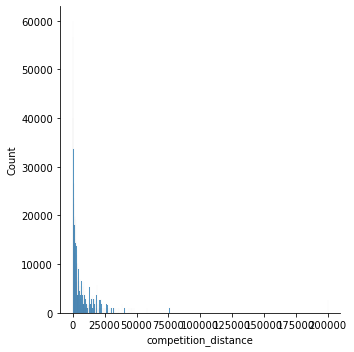

In [66]:
sns.displot(df1['competition_distance'])

## 1.7.2 Categorical Atributes

In [67]:
cat_attributes.apply(lambda x: x.unique().shape[0] )

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

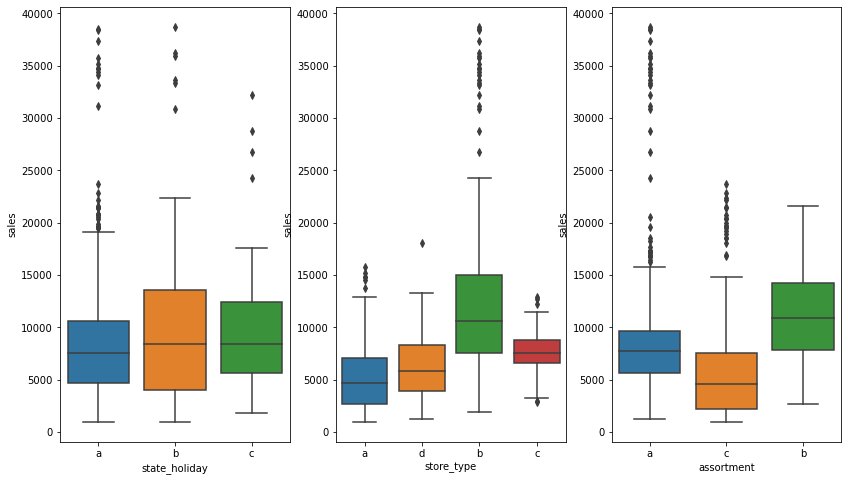

In [76]:
aux1 = df1[(df1['state_holiday'] != '0') & (df1['sales']>0)]

plt.figure(figsize=(14, 8))
plt.subplot(1,3,1)
sns.boxplot(x = 'state_holiday', y='sales', data=aux1)

plt.subplot(1,3,2)
sns.boxplot(x = 'store_type', y='sales', data=aux1)

plt.subplot(1,3,3)
sns.boxplot(x = 'assortment', y='sales', data=aux1)